# PCA - Esempi di applicazione

In [1]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
# %matplotlib widget
#
#
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

# Importazione di due datasets messi a disposizione da Scikit-Learn

Guardare https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets per maggiori informazioni sui datasets "giocattolo" messi a disposizione da Scikit-Learn.

Noi lavoreremo con il dataset "iris" ed il dataset "wine".

**Compito per lo studente:** guardare la documentazione di *datasets.load_iris* e *datasets.load_wine* (link sopra indicato) per capirne il contenuto.

In [2]:
iris_dataset = datasets.load_iris(as_frame=True)
wine_dataset = datasets.load_wine(as_frame=True)

iris = pd.concat([iris_dataset['data'], iris_dataset['target']], axis=1)
wine = pd.concat([wine_dataset['data'], wine_dataset['target']], axis=1)

display(iris)
print(iris_dataset['DESCR'])
display(wine)
print(wine_dataset['DESCR'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### Osservazioni:
1. Il dataset degli iris vede le feature dei fiori espresse tutte in cm e con range di valori tutti dello stesso ordine di grandezza
2. Il dataset dei vini vede features di vario tipo, espresse con unità di misura differenti e range di valori di ordine di grandezza differenti.

**Conseguenze:** 
1. Per gli iris possiamo usare la PCA "normale";
2. Per i vini non possiamo usare la PCA "normale", altrimenti la maggior parte della varianza verrebbe "mangiata" dalla feature "Proline". Per questo dataset applicheremo quindi una standardizzazione dei dati, oltre che un centramento.

Mostriamo la percentuale di varianza spiegata dalle varie PC per i due dataset. Nel caso dei vini mostriamo sia il caso con che senza standardizzazione.

**N.B.:** Per questa indagine preliminare, non ridurremo la dimensionalità del problema e considereremo quindi tutte le PC.

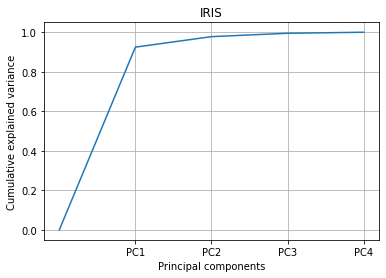

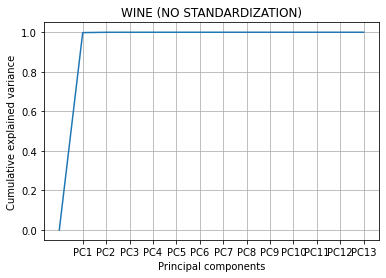

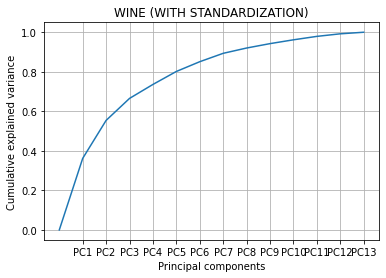

In [3]:
X_iris = iris.iloc[:, :-1]  # Escludo l'ultima colonna dei target
X_wine = wine.iloc[:, :-1]  # Escludo l'ultima colonna dei target

scaler_wine = StandardScaler()
scaler_wine.fit(X_wine.values)

X_wine_scaled = scaler_wine.transform(X_wine.values)

pca_iris = PCA()
pca_wine = PCA()
pca_wine_nostd = PCA()

pca_iris.fit(X_iris.values)
pca_wine.fit(X_wine_scaled)
pca_wine_nostd.fit(X_wine.values)

# NOTE:
# np.cumsum: funzione numpy che esegue la somma cumulative del vettore in argomento
# np.insert: permette di inserire un valore in un vettore alla posizione specificata
#
# COMPITO PER LO STUDENTE: guardare la documentazione numpy per comprendere il 
# funzionamento delle funzioni sopra indicate e delle funzioni di matplotlib usate 
# nel seguito.

plt.figure()
plt.plot(np.insert(np.cumsum(pca_iris.explained_variance_ratio_), 0, 0))
plt.title('IRIS')
plt.xticks(ticks=np.arange(1, pca_iris.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_iris.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure()
plt.plot(np.insert(np.cumsum(pca_wine_nostd.explained_variance_ratio_), 0, 0))
plt.title('WINE (NO STANDARDIZATION)')
plt.xticks(ticks=np.arange(1, pca_wine_nostd.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_wine_nostd.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure()
plt.plot(np.insert(np.cumsum(pca_wine.explained_variance_ratio_), 0, 0))
plt.title('WINE (WITH STANDARDIZATION)')
plt.xticks(ticks=np.arange(1, pca_wine.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_wine.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


## Visualizzazioni

Per le visualizzazioni, per esercizio sceglieremo m=2 PC per gli iris e m=3 PC per wine. Si osserva tuttavia che la varianza spiegata è molto alta per gli iris (quasi 100%) e "accettabile" per wine (quasi 70%).

In [ ]:
pca_iris_m = PCA(n_components=2)
pca_wine_m = PCA(n_components=3)

pca_iris_m.fit(X_iris.values)
pca_wine_m.fit(X_wine_scaled)

Y_iris_m = pca_iris_m.transform(X_iris.values)
Y_wine_m = pca_wine_m.transform(X_wine_scaled)

### Score Graph

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_iris_m[:, 0], Y_iris_m[:, 1], c=iris['target'].values)
plt.title('IRIS - SCORE GRAPH')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# NOTA: per i plot 3D, importare sempre Axes3D, cioè eseguire prima il 
# comando "from mpl_toolkits.mplot3d import Axes3D".
# Per ulteriori informazioni su plot 3D, consultare la documentazione di Matplotlib

fig_winescore = plt.figure()
ax = fig_winescore.add_subplot(111, projection='3d')
ax.scatter(Y_wine_m[:, 0], Y_wine_m[:, 1], Y_wine_m[:, 2], c=wine['target'].values)
plt.title('WINE - SCORE GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

### Loading Graph

In [ ]:
plt.figure()
for i in range(pca_iris_m.n_features_):
    plt.plot([0, pca_iris_m.components_[0, i]], [0, pca_iris_m.components_[1, i]], 
             label=X_iris.columns[i])
plt.scatter(pca_iris_m.components_[0, :], pca_iris_m.components_[1, :], c='k')
plt.legend()
plt.title('IRIS - LOADING GRAPH')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# NOTA: per i plot 3D, importare sempre Axes3D, cioè eseguire prima il 
# comando "from mpl_toolkits.mplot3d import Axes3D".
# Per ulteriori informazioni su plot 3D, consultare la documentazione di Matplotlib

fig_winescore = plt.figure()
ax = fig_winescore.add_subplot(111, projection='3d')
for i in range(pca_wine_m.n_features_):
    ax.plot([0, pca_wine_m.components_[0, i]], [0, pca_wine_m.components_[1, i]], 
            [0, pca_wine_m.components_[2, i]],
             label=X_wine.columns[i])
ax.scatter(pca_wine_m.components_[0, :], pca_wine_m.components_[1, :], pca_wine_m.components_[2, :], c='k')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='xx-small')
plt.title('WINE - LOADING GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()


### Biplot

**Compito per lo studente:** combinare i codici degli score e loading graphs per rappresentare i biplot.

In [ ]:
# ...

## Interpretazione delle PC

Vediamo il contributo delle features originali per le PC, aiutandoci con dei barplot.

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(pca_iris_m.n_features_), pca_iris_m.components_[0, :])
plt.xticks(ticks=np.arange(pca_iris_m.n_features_), 
           labels=X_iris.columns.to_list(),
           rotation=45)
plt.title('IRIS - PC1')
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(np.arange(pca_iris_m.n_features_), pca_iris_m.components_[1, :])
plt.xticks(ticks=np.arange(pca_iris_m.n_features_), 
           labels=X_iris.columns.to_list(),
           rotation=45)
plt.title('IRIS - PC2')
plt.grid()
plt.show()


**Assegnare nomi alle PC:** guardando ai barplot, potremmo (*per esempio*) assegnare alla PC1 il nome di "petal size and sepal length", mentre alla PC2 il nome di "sepal size".

**ESERCIZIO PER LO STUDENTE:** stampare i barplot delle PC corrispondenti al dataset wine e guardare se è possibile "assegnare loro un nome".

In [ ]:
# ...